# Introduction to _cohorts_

By Nick Giangreco,

Tatonetti Lab, 

Columbia University,

Created on:

In [1]:
!date

Wed Jan  9 14:34:18 EST 2019


_cohorts_ provides feasible data management for clinical proteomic experiments. Below we go over examples of loading and retrieving sample data. 

<hr>

load libraries

In [2]:
import cohorts
import pandas as pd
import numpy as np

package doctstring

In [3]:
print(cohorts.Cohort.__doc__)


	Patient cohort object for patient proteomics data.

	Dataframes, variables, and functions facilitating the processing, analysis, and integration of the cohort data.

	Parameters
	----------
	cohort: str
		name of the patient cohort

	file_dir: str
		directory where replicate dataframe and 
		sample group membership dataframe file names are located

	replicates_file: str
		name of the replicates dataframe file

		A markers x B replicates
		comma (*.csv) or tab (*.tsv) delimited

		replicate = "SampleName" + "_Rep[0-9]"

	sample_groups_file: str
		name of the sample group file
		comma (*.csv) or tab (*.tsv) delimited

		N groups x M samples

		sample = "SampleName"

	data_dir: str
		directory where extra data files are located
		
	uniprot_file: str
		name of the uniprot database flat file located in data_dir

	Examples
	--------
	>>>c = cohorts.Cohort(cohort='cohort_name',
		file_dir="path/to/files/",
		replicates_file="file_name",
		samples_file="file_name",
		sample_groups_file="samp

reference location of replicate/sample data files and create cohort object. Referencing values in dictionaries is a way to upload many cohort data instead of just one.

In [4]:
top = "./"
data_dirs = { 'my_cohort' : "../data/" }
file_dirs = { 'my_cohort' : top+"sample_data/" }
replicates_files = { 'my_cohort' : "df_replicates.tsv" }
sample_groups_files = { 'my_cohort' : "df_sample_groups.tsv" }
cohort = { 'my_cohort' : 'my_cohort' }
references = { 'my_cohort' : 'ref' }
treatments = { 'my_cohort' : 'trt' }
for cohort_name in file_dirs.keys():
    c = cohorts.Cohort(cohort=cohort[cohort_name],marker_type="protein",
                       data_dir=data_dirs[cohort_name],file_dir=file_dirs[cohort_name],
                       replicates_file=replicates_files[cohort_name],
                       sample_groups_file=sample_groups_files[cohort_name],
                       reference=references[cohort_name],
                       treatment=treatments[cohort_name])

list and display all object attributes

In [5]:
for attribute in c.__dict__.keys():
    attr = getattr(c,attribute)
    print("======")
    print("Attribute:",attribute)
    display(attr)

Attribute: cwd


'/Users/npg2108/GitHub/cohorts'

Attribute: data_dir


'../data/'

Attribute: file_dir


'./sample_data/'

Attribute: cohort


'my_cohort'

Attribute: marker_type


'protein'

Attribute: reference


'ref'

Attribute: treat


'trt'

Attribute: data


{}

Attribute: params


{}

Attribute: replicates_file


'./sample_data/df_replicates.tsv'

Attribute: raw_replicates


replicate,S10_Rep1,S10_Rep2,S1_Rep1,S1_Rep2,S2_Rep1,S2_Rep2,S3_Rep1,S3_Rep2,S4_Rep1,S4_Rep2,S5_Rep1,S5_Rep2,S6_Rep1,S6_Rep2,S7_Rep1,S7_Rep2,S8_Rep1,S8_Rep2,S9_Rep1,S9_Rep2
protein,,,,,,,,,,,,,,,,,,,,
E7EX29,0.977477,0.304410,0.526654,0.127130,5.199028,2.109347,2.249255,0.108401,0.875591,1.028805,0.920000,0.042764,4.221320,4.993079,0.691645,2.843608,2.702805,11.054266,0.056939,5.041705
P03950,0.075187,0.907472,2.641508,2.071905,5.416919,2.144553,0.901242,1.282467,2.578389,0.182659,0.157544,0.658971,0.752813,6.571444,2.805870,6.532070,7.965716,0.246137,5.003671,0.373763
P05067,0.214809,5.155476,0.760780,1.976759,1.736841,2.491382,0.790444,0.544351,6.843504,1.913787,7.910964,3.857954,1.874413,0.348689,2.120594,6.399730,0.904973,1.631184,0.301007,1.817747
P08253,0.154020,0.447184,0.850043,0.641323,3.698615,1.103303,0.076704,1.398809,2.013129,5.660915,4.112593,2.451870,0.587017,0.981799,0.649270,0.864091,1.813152,1.469418,0.608286,0.498515
P15144,2.589447,4.405096,0.907281,1.863856,6.259852,3.825411,5.288734,1.098613,0.540793,2.428891,0.195651,1.039652,3.192662,0.451817,0.316526,4.921793,0.587720,2.058128,3.562867,1.577427
P27338,0.396244,6.107705,2.504065,0.397693,4.305065,0.094969,0.788371,2.723448,0.396713,0.302483,3.477549,1.194654,0.836833,5.695107,7.138837,2.208008,0.561346,2.481271,3.406206,1.721506
P52209,2.787344,0.758593,1.928400,0.132313,0.923237,3.015603,1.805835,2.898382,0.208677,1.478625,1.456573,0.180620,1.046998,0.686258,2.455698,6.181536,9.570667,0.878119,0.005764,0.876215
P62191,1.151451,0.770435,0.791281,1.820099,0.758876,2.282401,0.675158,1.502792,0.352030,3.477358,3.310814,2.273665,0.658391,2.691015,0.432696,1.089667,0.147597,0.467557,0.604896,2.467717
Q8N302,0.045530,2.592093,4.864815,0.542662,0.481945,2.445767,4.673145,0.262777,5.679859,1.359762,0.520990,1.011805,2.345876,0.826695,0.725987,1.183249,0.033972,3.383350,0.567743,0.879773


Attribute: replicates_hq


None

Attribute: trans_replicates_hq


None

Attribute: sample_replicate_dictionary


{'S1': ['S1_Rep1', 'S1_Rep2'],
 'S10': ['S10_Rep1', 'S10_Rep2'],
 'S2': ['S2_Rep1', 'S2_Rep2'],
 'S3': ['S3_Rep1', 'S3_Rep2'],
 'S4': ['S4_Rep1', 'S4_Rep2'],
 'S5': ['S5_Rep1', 'S5_Rep2'],
 'S6': ['S6_Rep1', 'S6_Rep2'],
 'S7': ['S7_Rep1', 'S7_Rep2'],
 'S8': ['S8_Rep1', 'S8_Rep2'],
 'S9': ['S9_Rep1', 'S9_Rep2']}

Attribute: replicate_groups


replicate,S10_Rep1,S10_Rep2,S1_Rep1,S1_Rep2,S2_Rep1,S2_Rep2,S3_Rep1,S3_Rep2,S4_Rep1,S4_Rep2,S5_Rep1,S5_Rep2,S6_Rep1,S6_Rep2,S7_Rep1,S7_Rep2,S8_Rep1,S8_Rep2,S9_Rep1,S9_Rep2
group,,,,,,,,,,,,,,,,,,,,
cov,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ref,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
trt,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0


Attribute: replicates


['S10_Rep1',
 'S10_Rep2',
 'S1_Rep1',
 'S1_Rep2',
 'S2_Rep1',
 'S2_Rep2',
 'S3_Rep1',
 'S3_Rep2',
 'S4_Rep1',
 'S4_Rep2',
 'S5_Rep1',
 'S5_Rep2',
 'S6_Rep1',
 'S6_Rep2',
 'S7_Rep1',
 'S7_Rep2',
 'S8_Rep1',
 'S8_Rep2',
 'S9_Rep1',
 'S9_Rep2']

Attribute: samples_file


None

Attribute: sample_groups_file


'./sample_data/df_sample_groups.tsv'

Attribute: raw_samples


sample,S10,S1,S2,S3,S4,S5,S6,S7,S8,S9
protein,,,,,,,,,,
E7EX29,0.640943,0.326892,3.654187,1.178828,0.952198,0.481382,4.607199,1.767626,6.878535,2.549322
P03950,0.491330,2.356706,3.780736,1.091855,1.380524,0.408258,3.662129,4.668970,4.105926,2.688717
P05067,2.685142,1.368769,2.114112,0.667397,4.378646,5.884459,1.111551,4.260162,1.268078,1.059377
P08253,0.300602,0.745683,2.400959,0.737756,3.837022,3.282232,0.784408,0.756681,1.641285,0.553400
P15144,3.497272,1.385568,5.042631,3.193673,1.484842,0.617652,1.822239,2.619160,1.322924,2.570147
P27338,3.251974,1.450879,2.200017,1.755909,0.349598,2.336102,3.265970,4.673422,1.521308,2.563856
P52209,1.772969,1.030356,1.969420,2.352108,0.843651,0.818597,0.866628,4.318617,5.224393,0.440989
P62191,0.960943,1.305690,1.520638,1.088975,1.914694,2.792240,1.674703,0.761181,0.307577,1.536306
Q8N302,1.318812,2.703738,1.463856,2.467961,3.519811,0.766398,1.586285,0.954618,1.708661,0.723758


Attribute: samples_hq


None

Attribute: trans_samples_hq


None

Attribute: samples


['S10', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9']

Attribute: sample_groups


sample,S1,S10,S2,S3,S4,S5,S6,S7,S8,S9
group,,,,,,,,,,
cov,1,0,1,0,0,0,0,0,0,0
ref,0,1,0,0,0,0,1,1,1,1
trt,1,0,1,1,1,1,0,0,0,0


Attribute: groups


array(['cov', 'ref', 'trt'], dtype=object)

Attribute: markers


['E7EX29',
 'P03950',
 'P05067',
 'P08253',
 'P15144',
 'P27338',
 'P52209',
 'P62191',
 'Q8N302',
 'Q99460',
 'Q9UJX5',
 'Q9Y5C1']

For each cohort object, there are attributes that:

* define the location of the input data,
* store fields parsed from the input data, such proteins, samples, datasets (as pandas dataframes), etc. 
* store further processed data (these fields, the *\_hq attributes, are currently empty). These would be filled after an additional processing step outlined below 
* store cohort-specific data in a dictionary (these are currently empty and can be filled according to the user).

For further processing the data, we would like to transform (or not) the replicate dataset and transform (or not) the samples dataset. 

Below all we do is agregate the replicates of a sample by taking the average:

In [6]:
c.set_replicates_hq(all_reps_quant=True)
c.set_trans_replicates_hq()
c.set_samples_hq()
c.set_trans_samples_hq()

Let's say I want to make sure atleast one replicate per sample was quantified, average all replicates per sample, and then log2 transform the sample data

In [7]:
c.set_replicates_hq(quant_least_reps_per_samps=True,n_reps=1)
c.set_trans_replicates_hq()
c.set_samples_hq(agg='mean')
c.set_trans_samples_hq(trans='log2')

<hr>

There are also some pre-baked analysis functions.

For example, manual\_feature\_extraction will identify any proteins that are present/absent/mixed in samples of one condition or the other. The output is stored in the _data_ attribute and the attribute is 'mfe'

In [8]:
c.set_ref('ref')
c.set_treat('trt')
c.manual_feature_extraction(c.samples_hq)
print([a for a in c.data['mfe'].keys()])
display(c.data['mfe']['main']['df_len'])

ref/cov
ref/trt
['main', 'helper']


,ref/cov,ref/trt
allq_allq,12,12
allq_allnotq,0,0
allq_mixed,0,0
allnotq_allq,0,0
allnotq_allnotq,0,0
allnotq_mixed,0,0
mixed_allq,0,0
mixed_allnotq,0,0
mixed_mixed,0,0


we can view and access sets of proteins exhibiting a certain pattern as below

In [9]:
display(c.data['mfe']['helper']['allq_allq']['df_len'])
display(c.data['mfe']['helper']['allnotq_allnotq']['df_len'])
display(c.data['mfe']['helper']['allq_allnotq']['df_len'])
display(c.data['mfe']['helper']['allnotq_allq']['df_len'])
print(c.data['mfe']['helper']['allnotq_allq']['df_arr'].iloc[0,0])

,ref/cov,ref/trt
ref/cov,0,0
ref/trt,0,0


,ref/cov,ref/trt
ref/cov,0,0
ref/trt,0,0


,ref/cov,ref/trt
ref/cov,0,0
ref/trt,0,0


,ref/cov,ref/trt
ref/cov,0,0
ref/trt,0,0


set()


we can also perform some parametric/nonparametric hypothesis testing

In [10]:
import scipy

#two tests, the t-test and wilcoxon rank sum test, is used within each object (try c.tests) if none are given explicitly
print(c.tests)

#add another test to a new test list
tests = c.tests.copy()
tests.append(('ks_2samp',scipy.stats.kruskal))
print(tests)
#two tests, the t-test and wilcoxon rank sum test, is used within each object (try c.tests) if none are given explicitly


ht = c.hypothesis_testing(df=c.samples_hq,df_groups=c.sample_groups,tests=tests)
ht

[('t-test', <function ttest_ind at 0x180c4a4620>), ('Wilcoxon_RankSum_test', <function ranksums at 0x180c4a6c80>)]
[('t-test', <function ttest_ind at 0x180c4a4620>), ('Wilcoxon_RankSum_test', <function ranksums at 0x180c4a6c80>), ('ks_2samp', <function kruskal at 0x180c48a0d0>)]
A list of statistical tests are required. For example: [( "t-test",scipy.stats.ttest_ind )]. More than one can be given.


,protein,test,pvalue,statistic
0,protein,t-test,0.156775,1.562592
1,protein,t-test,0.197194,1.406564
2,protein,t-test,0.506047,-0.696160
3,protein,t-test,0.073529,-2.058517
4,protein,t-test,0.981081,0.024464
5,protein,t-test,0.050486,2.299811
6,protein,t-test,0.296437,1.116946
7,protein,t-test,0.122399,-1.727213
8,protein,t-test,0.111349,-1.789354
9,protein,t-test,0.243459,1.259187


Here's some examples extracting data using cohort object attributes and plotting with object data

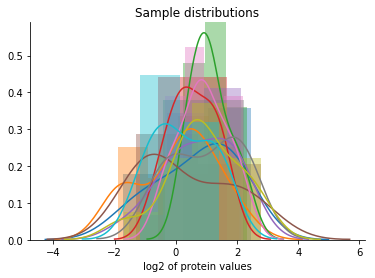

In [11]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
df_samples = c.raw_samples.apply(lambda x: np.log2(x))
for n in range(0,df_samples.shape[1],1):
    sns.distplot(df_samples.iloc[:,n])
plt.xlabel('log2 of protein values')
plt.title('Sample distributions')
sns.despine()

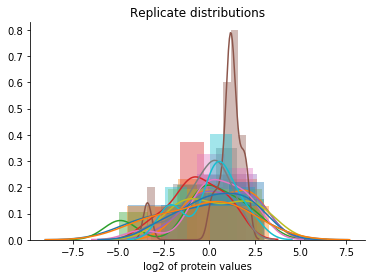

In [12]:
df_replicates = c.raw_replicates.fillna(0).apply(np.log2)
for n in range(0,df_replicates.shape[0],1):
    sns.distplot(df_replicates.iloc[:,n])
plt.xlabel('log2 of protein values')
plt.title('Replicate distributions')
sns.despine()

These are just a few examples of what could be done with the package. For further information please view the source code. If you have any questions or code modifications, submit an issue or even a pull request!